# INTELIGENCIA ARTIFICIAL (1INF24)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)

## <font color=blue>Preprocesamiento de datos: Caso de estudio</font>

## Entendimiento del negocio

El sector de telefonía móvil está saturado de compañías operadoras, lo cual  dificulta la captura de nuevos clientes. Las compañías tienen el constante desafío de diseñar campañas para disminuir la **tasa de abandono de sus clientes** (conocido como *churn*). Esta tasa de abandono puede ser definida como el cociente de la **cantidad de clientes que se pierden en un periodo** entre la **cantidad de clientes en un punto en el tiempo** que sirve de referencia. Por ejemplo: si al inicio de un mes se tuvieran 100 clientes y durante el mes se pierden 5, la tasa de abandono sería del 5%.

La compañía de Telefonía X lo ha contratado a usted como científico de datos y le ha encargado la tarea de construir un modelo de predicción de abandono de clientes a fin de poder hacer acciones de retención antes de que el cliente se vaya. Para ello la compañía le ha disponibilizado los siguientes archivos de datos (considere que cada registro corresponde a una línea de un cliente):

1. <font color=blue>Clientes_general.csv</font>: Tabla con información general de clientes.
2. <font color=blue>Clientes_detalle.csv</font>: Tabla con información de comportamiento de los clientes e información de Churn.

**En este cuaderno se le pide realizar un análisis exploratorio y limpieza de los datos con el fin de obtener un dataset limpio y usable para entrenar los modelos de machine learning.**

## Diccionario de datos

**Clientes_general.csv** tiene los siguientes campos:
* Client_ID: Identificador único del cliente.
* Género: (M) para masculino, (F) para femenino.
* Edad: Años cumplidos del cliente.
* NSE: Nivel socioecónomico del cliente.
* Estado civil: (S) soltero, (C) casado, (V) viudo.
* Departamento: Lugar de residencia declarada por el cliente.

**Clientes_detalle.csv** tiene los siguientes campos:
* Client_ID: Identificador único del cliente.
* Renta: Renta básica del plan.
* Uso_SMS: Número de SMS enviados en el mes.
* Deuda_Ant: Deuda facturada en el mes anterior.
* Min_callcenter: Minutos de llamadas al centro de atención.
* Antiguedad: Antiguedad del cliente (en meses).
* Uso_MB: Total de MB consumidos en el periodo.
* Deuda_Act: Deuda facturada en el mes.
* Uso_APP: MB Consumidas en el APP de la operadora.
* Min_Ent_3M: Cantidad de llamadas recibidas por el cliente en los últimos 3 meses.
* Min_Sal_3M: Cantidad de llamadas realizadas por el cliente en los últimos 3 meses.
* Churn: 0, si la línea ya no se encuentra activa al cierre (el cliente se fue), 1 si cierra en estado suspendida y 2 si cierra en estado activo.

## Cargando datos

In [1]:
import pandas as pd
import numpy as np

# Importamos la informacion de la tabla Maestro Clientes.
df_clientes_general = pd.read_csv('Clientes_general.csv', index_col = 0, sep = ';')
print('Se leyó un dataset de dimensiones {}'.format(df_clientes_general.shape))
df_clientes_general.head()

Se leyó un dataset de dimensiones (5000, 6)


,GENERO,EDAD,NSE,ESTADOCIVIL,DEPARTAMENTO,CAPDEUDA
CLIENT_ID,,,,,,
0,F,999,1,S,LIMA,47.903088
1,M,26,1,C,LIMA,50.414563
2,F,35,1,NaN,LIMA,49.516079
3,M,30,1,V,LIMA,48.304420
4,F,65,1,NaN,LIMA,49.493112


In [2]:
# Leemos el contenido de la tabla de Consumos de Clientes
df_clientes_detalle =  pd.read_csv('Clientes_detalle.csv', index_col = 0, sep = ';')
print('Se leyó un dataset de dimensiones {}'.format(df_clientes_detalle.shape))
df_clientes_detalle.head()

Se leyó un dataset de dimensiones (5000, 11)


,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,
0,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,NaN,50.205127,50.693596,0
1,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,NaN,48.686966,49.074329,1
2,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,NaN,49.441751,49.950721,2
3,50.971497,NaN,50.074096,47.980931,49.0,49.279711,NaN,NaN,49.966708,51.943082,0
4,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,NaN,NaN,52.333953,47.780843,0


In [3]:
# Unimos ambos DataFrames para obtener el tablón final
df =  pd.concat([df_clientes_general, df_clientes_detalle], axis = 1)
print('Dimensiones del dataset final {}'.format(df.shape))

Dimensiones del dataset final (5000, 17)


In [4]:
df

,GENERO,EDAD,NSE,ESTADOCIVIL,DEPARTAMENTO,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,,,,,,,
0,F,999,1,S,LIMA,47.903088,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,NaN,50.205127,50.693596,0
1,M,26,1,C,LIMA,50.414563,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,NaN,48.686966,49.074329,1
2,F,35,1,NaN,LIMA,49.516079,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,NaN,49.441751,49.950721,2
3,M,30,1,V,LIMA,48.304420,50.971497,NaN,50.074096,47.980931,49.0,49.279711,NaN,NaN,49.966708,51.943082,0
4,F,65,1,NaN,LIMA,49.493112,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,NaN,NaN,52.333953,47.780843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F,42,1,NaN,LIMA,50.240065,52.608227,49.808223,48.698675,51.118317,49.0,50.070613,49.166037,51.653162,49.190714,52.884632,0
4996,F,55,1,NaN,LIMA,49.801977,50.590995,49.596323,51.106849,50.093415,51.0,49.262545,51.196843,47.139634,52.297870,47.444417,0
4997,F,57,1,NaN,LIMA,49.364990,51.007461,49.368893,51.027496,49.989128,51.0,47.071695,50.965422,52.767131,48.019767,52.169040,1


## Generando la variable TARGET
Primero, revisamos la distribución de la variable target de predicción, en este caso, la columna CHURN

In [5]:
df.CHURN.value_counts()

,count
CHURN,
1,1672
2,1668
0,1660


Como solo queremos predecir si el cliente se va a ir o no, transformamos la variable para que sea binaria. Así, se simplifica el problema a clasificación binaria. Creamos un nuevo atributo 'TARGET' y asignamos el valor 1 si el cliente se fue (valor 0 en la columna CHURN) y valor 0 si el cliente no se fue (valores 1 o 2 en CHURN).

In [6]:
import numpy as np

# Funcion np.where(<condicion>, <valor cierto>, <valor falso>)
df['TARGET'] = np.where(df['CHURN'] == 0, 1, 0)

# Revisamos como queda la variable
df.TARGET.value_counts()

,count
TARGET,
0,3340
1,1660


In [7]:
# Eliminamos la variable original ya que no la usaremos. Usaremos el TARGET
df = df.drop(columns = ['CHURN'])

In [8]:
# Revisamos como queda el balance de las clases (en porcentajes)
(df.TARGET.value_counts() / df.shape[0]) * 100

,count
TARGET,
0,66.8
1,33.2


En este caso, se puede observar que existe un desbalance entre las clases (66% vs 33%). Este desbalance no es muy fuerte.

## Verificando los tipos de datos de las columnas y haciendo correcciones si es necesario
Revisamos que los tipos de datos sean los esperados, sino los corregimos.

In [9]:
df.dtypes

,0
GENERO,object
EDAD,object
NSE,int64
ESTADOCIVIL,object
DEPARTAMENTO,object
CAPDEUDA,float64
RENTA,float64
USO_SMS,float64
DEUDA_ANT,float64
MIN_CALLCENTER,float64


In [10]:
# Observamos que EDAD presenta datos que no son numericos. Vemos si son muchos para decidir que hacemos
df.loc[df.EDAD.str.isnumeric() == False]

,GENERO,EDAD,NSE,ESTADOCIVIL,DEPARTAMENTO,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,TARGET
CLIENT_ID,,,,,,,,,,,,,,,,,
10,M,F,1,NaN,CUSCO,50.847162,50.370561,49.711894,51.074273,50.530617,51.0,49.070965,50.038386,NaN,48.479477,49.502619,0
2714,F,F,1,NaN,ANCASH,49.290262,52.549586,49.378466,48.657592,49.122548,47.0,49.682579,51.196669,51.890967,50.319754,54.266772,1
4202,M,F,1,NaN,ANCASH,51.314260,46.476247,50.602826,50.989300,53.989425,58.0,50.134954,49.393172,50.673794,48.023201,45.490836,0


In [11]:
# Siendo solo 3 casos, se decide dropear los registros
df = df.drop(df.loc[df.EDAD.str.isnumeric() == False].index)

In [12]:
# Seteamos la variable EDAD como numerica
df['EDAD'] = df['EDAD'].astype(np.int64)

## Lidiando con nulos y dropeando columnas que no sean de utilidad
Buscamos los valores nulos. Los mostramos en porcentaje del total de información.

In [13]:
df.shape[0]

4997

In [14]:
df.isnull().sum() / df.shape[0] * 100

,0
GENERO,1.000600
EDAD,0.000000
NSE,0.000000
ESTADOCIVIL,96.437863
DEPARTAMENTO,0.000000
CAPDEUDA,0.000000
RENTA,0.000000
USO_SMS,1.180708
DEUDA_ANT,0.600360
MIN_CALLCENTER,1.100660


In [15]:
# Estado civil tiene mas de 90% de nulos, resulta mas conveniente dropear la columna
df = df.drop(columns = ['ESTADOCIVIL'])

In [16]:
df.shape

(4997, 16)

In [17]:
# Exploramos genero
df.GENERO.value_counts()

,count
GENERO,
F,2475
M,2472


In [18]:
# En el caso de genero, eliminamos todas las filas con nulos en la variable GENERO (son solo 50 filas)
df.dropna(subset = ['GENERO'], inplace = True)

In [19]:
# Reemplazamos los vacios en DEUDA_ANT por el valor promedio de deuda de la base
df['DEUDA_ANT'] = np.where(df.DEUDA_ANT.isnull(), df.DEUDA_ANT.mean(), df.DEUDA_ANT)

# Reemplazamos los vacios en DEUDA_ACT para que tengan el mismo valor que DEUDA_ANT
# ya que es muy frecuente que el monto facturado en dos meses consecutivos sea el mismo
df['DEUDA_ACT'] = np.where(df.DEUDA_ACT.isnull(), df.DEUDA_ANT, df.DEUDA_ACT)

# Valores vacios en USO_SMS y USO_APP significa que no fueron usados durante el mes
# ya que ambos campos se obtuvieron de un cruce con tablas transaccionales
# Por ello, podemos reemplazar los vacios por cero.
# Pandas provee la funcion fillna que facilita dicha acción.
df = df.fillna(value = {'USO_SMS' : 0, 'USO_APP' : 0, 'MIN_CALLCENTER' : 0})

# La cantidad de nulos en antiguedad es minima. Completamos los nulos de antiguedad por el valor de la mediana
df = df.fillna(value = {'ANTIGUEDAD': df.ANTIGUEDAD.median()})

In [20]:
# Chequeamos los nulos en cada feature
df.isnull().sum()

,0
GENERO,0
EDAD,0
NSE,0
DEPARTAMENTO,0
CAPDEUDA,0
RENTA,0
USO_SMS,0
DEUDA_ANT,0
MIN_CALLCENTER,0
ANTIGUEDAD,0


Vemos que ya no hay nulos en nuestro dataset.

## Corrección de valores inconsistentes y outliers

Buscamos inconsistencias en las variables. Para ello, mostramos los descriptivos estadísticos.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EDAD,4947.0,40.475035,20.177957,5.000000,27.500000,40.000000,53.000000,999.000000
NSE,4947.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CAPDEUDA,4947.0,50.003427,0.995718,46.080974,49.342661,50.011050,50.676716,53.821671
RENTA,4947.0,49.994853,1.699766,44.507645,48.784863,49.952095,51.148482,55.868670
USO_SMS,4947.0,49.398370,5.517454,0.000000,49.298449,49.963932,50.657670,53.895572
DEUDA_ANT,4947.0,49.998654,1.000752,46.433099,49.339064,50.002684,50.679311,53.146460
MIN_CALLCENTER,4947.0,49.094747,5.550349,0.000000,48.273452,49.576959,50.932592,56.371546
ANTIGUEDAD,4947.0,50.003436,1.899568,42.000000,49.000000,50.000000,51.000000,59.000000
USO_MB,4947.0,49.667248,1.669743,43.882448,48.474111,49.653746,50.879703,55.867741
DEUDA_ACT,4947.0,49.992379,1.010629,46.710618,49.297794,50.008829,50.669273,53.424610


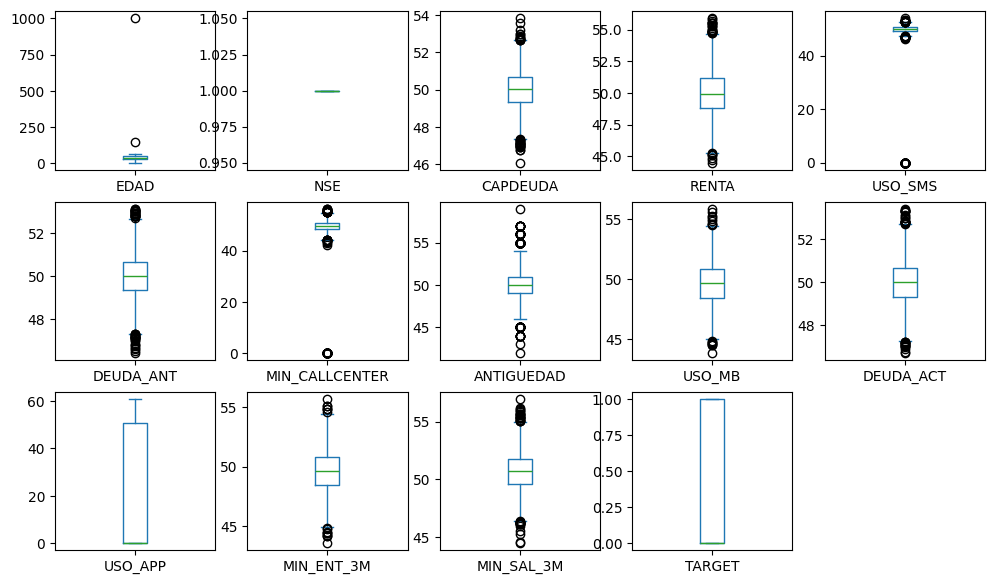

In [22]:
# Mostramos boxplots de los features
import matplotlib.pyplot as plt
df.plot(kind = 'box', subplots = True, layout = (3, 5), sharex = True, sharey = False,  figsize = [12, 7])
plt.show()

In [23]:
# Observamos que NSE tiene valor constante (1.0). Por lo tanto, no sirve como variable predictora
df = df.drop(columns = ['NSE'])

Podemos  corregir manualmente algunos outliers, usando el criterio de que usuarios no pueden ser menores de edad o mayores de 80.

In [24]:
# Observamos que EDAD tiene valores inconsistentes: no puedo tener clientes menores de 18 años. Tampoco existen personas de 999 años.

# A todos los que tienen menos de 18, les asignamos directamente 18 años de edad (mínimo legal)
df.loc[df.EDAD < 18, 'EDAD'] = 18

# Todo valor por encima de los 80 años se le colocará simplemente 80 (no se espera que sean muchos casos por el tamaño poblacional)
df.loc[df.EDAD > 80, 'EDAD'] = 80

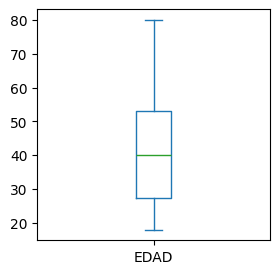

In [25]:
# Verificamos
df.EDAD.plot(kind = 'box', figsize = [3, 3])
plt.show()

Veamos la corrección de la columna CAPDEUDA usando los valores extremos del boxplot.

In [26]:
# Todo valor outlier se le asigna el menor/mayor valor no outlier
q1 = df.CAPDEUDA.quantile(0.25)
q3 = df.CAPDEUDA.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr  # Encima del bigote
ll = q1 - 1.5 * iqr  # Debajo del bigote
df.loc[df.CAPDEUDA > ul, 'CAPDEUDA'] = ul
df.loc[df.CAPDEUDA < ll, 'CAPDEUDA'] = ll

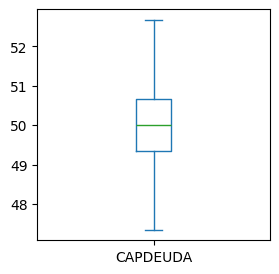

In [28]:
# Verificamos
df.CAPDEUDA.plot(kind = 'box', figsize = [3, 3])
plt.show()

Podemos definir una función para generalizar la corrección de outliers hecha en CAPDEUDA a cualquier columna numérica.

In [29]:
# Hacemos que los outliers sean reemplazados por el menor/mayor valor no outlier
# No se incluyen las variables USO_APP, USO_SMS o USO_MB ya que en ellas el 0 sí es un dato real
columnas_lst = ['RENTA', 'DEUDA_ANT', 'ANTIGUEDAD', 'DEUDA_ACT', 'MIN_ENT_3M', 'MIN_SAL_3M']

Cualquier valor, que esté más allá del rango de -1.5 x IQR a 1.5 x IQR es considerado outlier.

In [30]:
def corrige_outliers(dfx, columnas_lst):
  for columna in columnas_lst:
    q1 = dfx[columna].quantile(0.25)
    q3 = dfx[columna].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr  # upper_limit
    ll = q1 - 1.5 * iqr  # lower_limit
    dfx.loc[dfx[columna] > ul, columna] = ul
    dfx.loc[dfx[columna] < ll, columna] = ll
  return dfx

In [31]:
# Aplica la funcion de correccion de outliers a las columnas numericas en columnas_lst
df = corrige_outliers(df, columnas_lst)

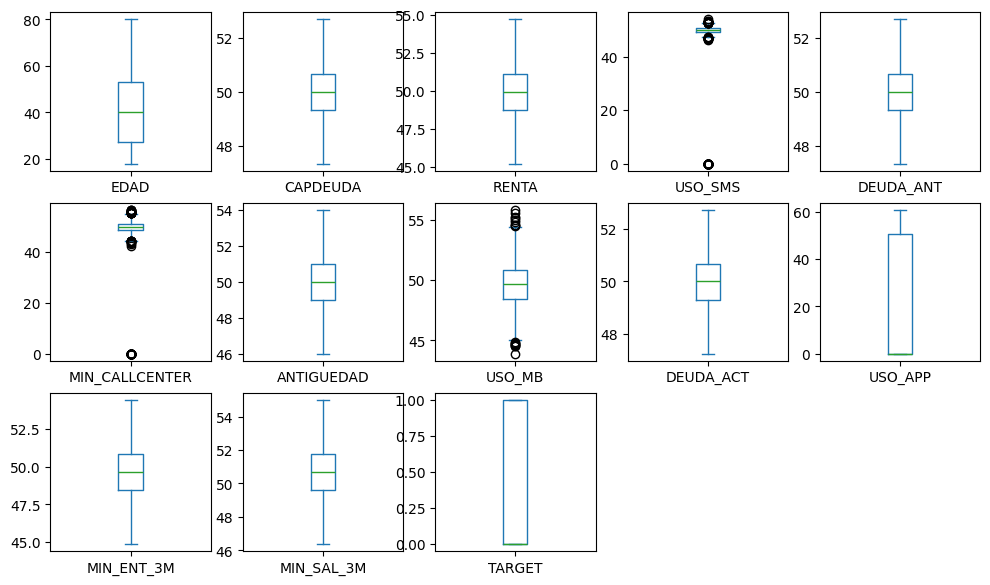

In [32]:
# Verificamos
df.plot(kind = 'box', subplots = True, layout = (3, 5), sharex = True, sharey = False, figsize = [12, 7])
plt.show()

In [33]:
# Se observa que una alta proporción de USO_APP es 0. Chequeamos cuanto es esta proporcion
df.loc[df.USO_APP == 0].shape[0]/df.shape[0]

0.522134627046695

In [34]:
# Vemos que más del 50% de la variable USO_APP es 0, dropeamos esta variable ya que es poco probable que contribuya en el modelo
df = df.drop(columns = 'USO_APP')

## Entendiendo Correlaciones entre Features
Revisamos correlaciones entre variables numéricas.

In [35]:
pd.set_option('display.precision', 2)  # Setea la cantidad de decimales a mostrar en lo sucesivo en los dataframes

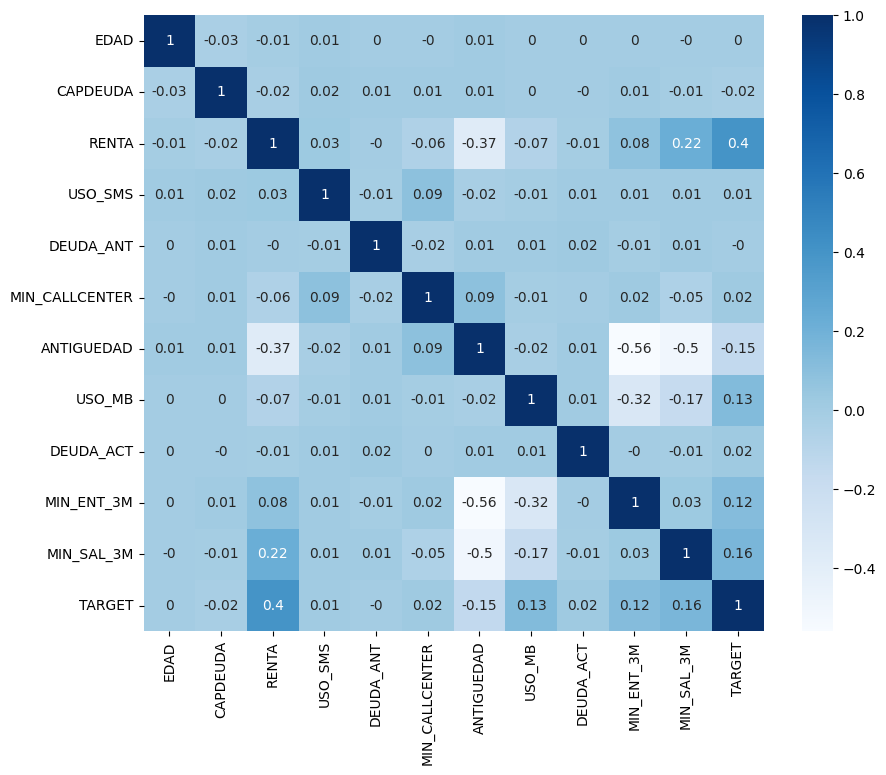

In [36]:
import seaborn as sns

df_corr = df.corr(numeric_only = True).apply(lambda x: round(x, 2))
plt.figure(figsize = (10, 8))
sns.heatmap(df_corr, annot = True, cmap = 'Blues')
plt.show()

Dado que no hay correlaciones fuertes, no eliminamos ninguna variable, ya que no hay redundancia entre ellas.

## Codificamos las variables categóricas a numéricas para su uso en ML

In [37]:
# Veamos los diferentes valores del feature DEPARTAMENTO
df.DEPARTAMENTO.value_counts()

,count
DEPARTAMENTO,
LIMA,1129
AREQUIPA,481
PASCO,480
CUSCO,478
AYACUCHO,319
ICA,319
TACNA,319
JUNIN,319
PUNO,160


In [38]:
# Creamos 4 variables binarias (Norte, Sur, Centro y Lima) en base a la ubicacion del DEPARTAMENTO.
# Esta codificacion se llama one-hot encoding y es util para convertir categorias en valores numericos
df['LIMA'] = np.where(df.DEPARTAMENTO == 'LIMA', 1, 0)
df['SUR'] = np.where(df.DEPARTAMENTO.isin(['AREQUIPA', 'CUSCO', 'ICA', 'AYACUCHO', 'TACNA', 'MOQUEGUA', 'PUNO']), 1, 0)
df['CENTRO'] = np.where(df.DEPARTAMENTO.isin(['PASCO', 'JUNIN', 'UCAYALI']), 1, 0)
df['NORTE'] = np.where(df.DEPARTAMENTO.isin(['LA LIBERTAD', 'LORETO', 'PIURA', 'ANCASH']), 1, 0)

In [39]:
# Borramos el feature DEPARTAMENTO, ya que solo se usará las variables binarias que acabamos de codificar
df = df.drop(columns = 'DEPARTAMENTO')

**Nota importante**: En este caso, esta forma de codificación  resulta igual que usando dummies (One-hot encoding). El procedimiento es adecuado debido a que no hay una relación de orden entre los elementos. Si se hubiese usado "cat.codes" o "LabelEncoder()", los resultados en algunos algoritmos de ML (como los que dependen de distancias) podrian ser erróneos.

In [40]:
df.sample(5)

,GENERO,EDAD,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,TARGET,LIMA,SUR,CENTRO,NORTE
CLIENT_ID,,,,,,,,,,,,,,,,,
558,F,65,50.90,51.22,51.16,50.28,48.28,50.0,46.24,50.68,48.86,53.65,0,1,0,0,0
4970,M,61,48.60,49.46,51.28,48.67,50.58,52.0,50.73,51.03,46.94,48.38,0,0,1,0,0
4900,F,41,50.26,51.39,50.12,49.39,49.98,50.0,48.89,51.59,49.78,50.71,0,1,0,0,0
864,M,49,51.01,49.67,0.00,48.53,49.97,50.0,52.44,48.85,47.27,50.32,1,0,0,1,0
4645,F,51,50.80,54.69,50.30,50.46,50.02,49.0,49.74,50.28,50.92,51.06,0,0,0,1,0


Si bien el encoding se puede hacer manualmente, scikit-learn provee de un conjunto de Encoders que facilitan la tarea
```
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(df['DEPARTAMENTO'])
df['DEPARTAMENTO'] = label_encoder.transform(df['DEPARTAMENTO'])
```
Este código hubiera asignado un codigo numerico a cada categoría distinta en DEPARTAMENTO (entre 0 a #categorias-1). No es recomendable esta codificación ya que no hay una relación de orden entre las categorías. (Mejor one-hot encoding)

También se puede usar "cat.codes" pero transforma valores categóricos a numéricos en orden alfabético descendiente.
```
df['DEPARTAMENTO'].cat.codes
```

In [41]:
# Chequeamos si hay mas variables categoricas que necesitemos codificar a numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4947 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENERO          4947 non-null   object 
 1   EDAD            4947 non-null   int64  
 2   CAPDEUDA        4947 non-null   float64
 3   RENTA           4947 non-null   float64
 4   USO_SMS         4947 non-null   float64
 5   DEUDA_ANT       4947 non-null   float64
 6   MIN_CALLCENTER  4947 non-null   float64
 7   ANTIGUEDAD      4947 non-null   float64
 8   USO_MB          4947 non-null   float64
 9   DEUDA_ACT       4947 non-null   float64
 10  MIN_ENT_3M      4947 non-null   float64
 11  MIN_SAL_3M      4947 non-null   float64
 12  TARGET          4947 non-null   int64  
 13  LIMA            4947 non-null   int64  
 14  SUR             4947 non-null   int64  
 15  CENTRO          4947 non-null   int64  
 16  NORTE           4947 non-null   int64  
dtypes: float64(10), int64(6), object(1)
me

La variable GENERO es de tipo object, presumiblemente almacena categorias

In [42]:
# Analicemos que categorias tiene la variable GENERO
df.GENERO.value_counts()

,count
GENERO,
F,2475
M,2472


In [43]:
# Podemos binarizar GENERO usando dummies (One-hot encoding)
# Como son 3 categorias de Genero, se crearán 3 features one-hot
df = pd.get_dummies(df, columns = ['GENERO'])

In [44]:
df.sample(10)

,EDAD,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,TARGET,LIMA,SUR,CENTRO,NORTE,GENERO_F,GENERO_M
CLIENT_ID,,,,,,,,,,,,,,,,,,
3080,46,49.39,51.12,51.30,48.05,47.23,49.0,49.67,48.27,50.32,51.26,1,0,1,0,0,False,True
2639,60,49.51,47.12,49.84,49.28,49.94,53.0,50.95,50.21,47.58,49.54,0,1,0,0,0,False,True
1319,41,49.38,47.50,50.23,51.34,50.57,50.0,49.20,49.42,50.73,49.31,0,0,0,0,1,True,False
4429,42,50.06,53.21,50.79,51.01,50.61,52.0,51.73,50.05,48.05,51.43,1,0,0,1,0,False,True
4119,65,49.46,48.56,49.48,49.24,49.63,50.0,50.49,49.57,50.91,50.48,0,0,0,1,0,True,False
1257,47,49.95,50.65,49.22,49.80,49.97,49.0,49.57,49.81,54.14,46.83,1,0,0,0,1,True,False
2120,27,49.94,49.51,51.38,49.98,47.19,49.0,51.41,48.79,47.93,51.52,0,0,1,0,0,True,False
893,43,48.30,49.54,47.98,49.62,49.52,48.0,50.93,49.40,49.71,52.05,0,0,1,0,0,True,False
1210,39,48.50,49.55,50.25,50.75,47.43,50.0,48.08,50.01,50.75,51.73,0,1,0,0,0,False,True


In [45]:
# Dropeamos alguna de las 2 columnas 'GENERO_M' o GENERO_M, ya que contienen la misma informacion
df = df.drop(columns = ['GENERO_M'])

In [46]:
# Finalmente, chequeamos que todas las variables sean numericas
df.dtypes

,0
EDAD,int64
CAPDEUDA,float64
RENTA,float64
USO_SMS,float64
DEUDA_ANT,float64
MIN_CALLCENTER,float64
ANTIGUEDAD,float64
USO_MB,float64
DEUDA_ACT,float64
MIN_ENT_3M,float64


In [47]:
# Salvamos la data procesada en un archivo, la cual esta lista para ser usada por algoritmos de ML
df.to_excel('DatosProcesados.xlsx')